In [7]:
# model of training overhang over time
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import latex


In [8]:
cost = 1000
cost_per_flop_year = 0.8
flops_per_dollar_year0 = 1e9 / 0.02
alg_gains_train = 1.8
alg_gains = alg_gains_train

# Chinchilla function relating compute to perplexity
chin_func = lambda x: 1070 * x ** (-0.154) + 1.7
total_loss = lambda cost, time: chin_func(
    (alg_gains**time) * flops_per_dollar_year0 * cost / (cost_per_flop_year**time)
)


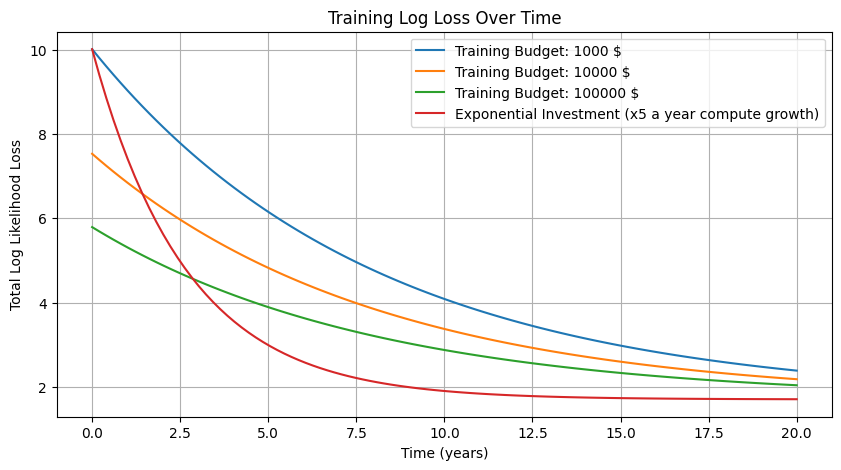

In [9]:
# Graph this function with respect to time
time = np.linspace(0, 20, 100)
player1_growth = 5 # model compute is growing at 5 times a year 
player2_growth = 1.1

# Loss for best model over time
# player2loss = total_loss(1000*(player1_growth) ** (time), time-2)
player1loss = total_loss(1000 * (player1_growth) ** time, time)
# logistic_investment = lambda time: 1000 + 10000/ (1 + np.exp(-1 * (time)))
# logistic_investment = lambda time: 1000 + 5e9/ (1 + (2e9)*np.exp(-5* (time+2)))
# logistic_loss = total_loss(logistic_investment(time), time)

#make investment schedule where invesemtent increasese exponentially but then stops 
#

# Graph with multiple costs adding cost labels
plt.figure(figsize=(10, 5))
for c in [1000, 10000, 100000]:
    loss = total_loss(c, time)
   
    plt.plot(time, loss, label=f"Training Budget: {c} $")
plt.plot(time, player1loss, label="Exponential Investment (x5 a year compute growth)")
# plt.plot(time, player2loss, label="Staggered Exponenetial Growth")
# plt.plot(time, logistic_loss, label="Logistic Investment")
plt.xlabel("Time (years)")
plt.ylabel("Total Log Likelihood Loss")
plt.legend()
plt.title("Training Log Loss Over Time")
plt.grid(True)


In [10]:
# time = np.linspace(0, 2, 100)
# plt.figure(figsize=(10, 5))
# # logistic_investment = lambda time: 1000 + 1e10/ (1 + 1e5*np.exp(-np.log(5)* (time+1)))
# plt.plot(time, logistic_investment(time), label="Logistic Investment")
# plt.plot(time, 1000 * (player1_growth) ** time, label="Exponential Investment")
# plt.xlabel("Time (years)")
# plt.ylabel("Investment")
# plt.legend()


Best Exponential Model growth: 5 times a year, it starts out with 1000 dollars, we assume consumer starts out with capital of 1000 dollars


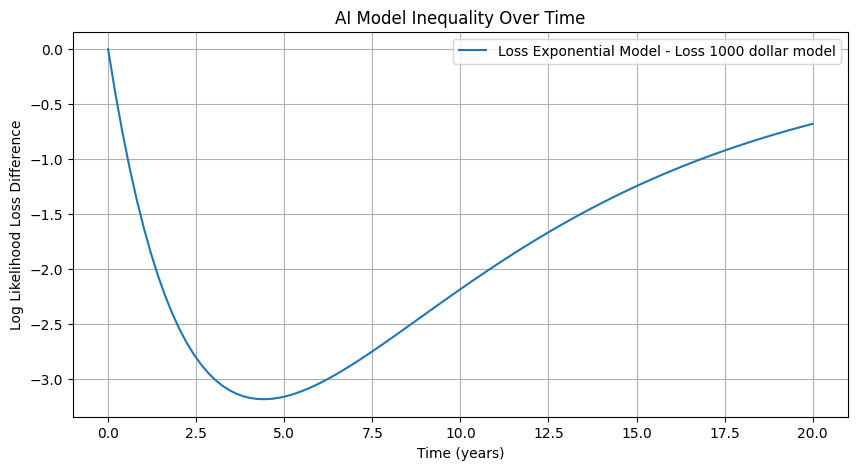

In [11]:
# Plot of overhang over time
time = np.linspace(0, 20, 100)

start_capital = 1000
consumer_capital = 1000
player1_growth = 5 # model compute is growing at 5 times a year 
player2_growth = 1.1
player1loss = total_loss(start_capital * (player1_growth) ** time, time)
plt.figure(figsize=(10, 5))
plt.plot(
    time, player1loss -total_loss(consumer_capital, time), label="Loss Exponential Model - Loss 1000 dollar model")

# add description 
print(f"Best Exponential Model growth: {player1_growth} times a year, it starts out with {start_capital} dollars, we assume consumer starts out with capital of 1000 dollars")
# add description to plot



# plt.plot(time, player1loss-player2loss, label="Second Best Model")
# plt.plot(
#     time,
#     np.log(logistic_loss/total_loss(1000, time)),
#     label="Loss Diff logisitic investment vs 1000 dollar training run",
# )

# plt.plot(
#     time,
#     player1loss-player2loss,
#     label="Exponential Investment over staggered exponential growth",
# )

# plt.xlabel("Time (years)")
plt.title("AI Model Inequality Over Time")
plt.xlabel("Time (years)")
plt.legend()
plt.ylabel("Log Likelihood Loss Difference")
plt.grid(True)


In [12]:

# plt.plot(time, player1loss-player2loss, label="Second Best Model")
# plt.plot(
#     time,
#     np.log(logistic_loss/total_loss(1000, time)),
#     label="Loss Diff logisitic investment vs 1000 dollar training run",
# )

# plt.plot(
#     time,
#     player1loss-player2loss,
#     label="Exponential Investment over staggered exponential growth",
# )

# plt.xlabel("Time (years)")
# plt.title("AI Model Inequality Over Time")
# plt.xlabel("Time (years)")
# plt.legend()
# plt.ylabel("Log Likelihood Loss Difference")
# plt.grid(True)


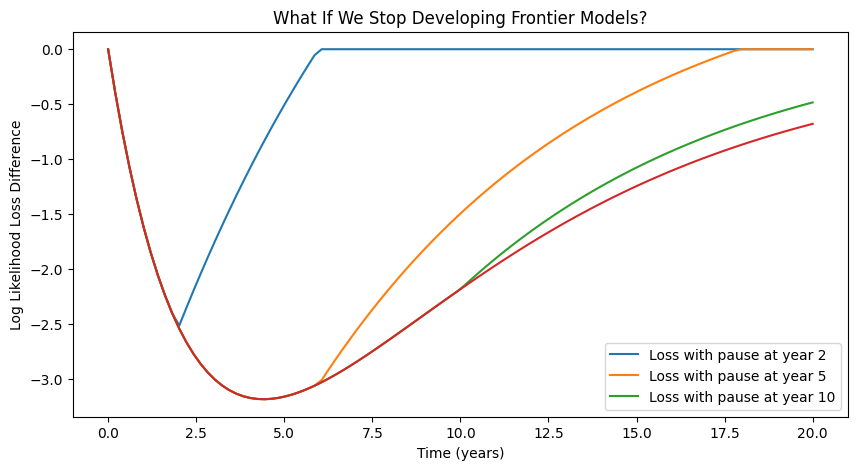

In [13]:
#trying to model AI pauses and overhang period 
#Plot the overhang when model progress is paused
times = np.linspace(0, 20, 100)
plt.figure(figsize=(10, 5))
#compute loss with exponential investment upto time  t
intitial_loss = total_loss(1000 * (player1_growth) ** time, time)

#plot this for serval pause-times
pause_time = 5
def pause_loss(pause_time):
    loss = []
    for time in times:
        
        if time < pause_time:
            loss.append(total_loss(1000 * (player1_growth) ** time, time)- total_loss(1000, time))
        else:
            bestloss = total_loss(1000 * (player1_growth) ** pause_time, pause_time) 
            pause_loss = bestloss - total_loss(1000, time)
            consumer_loss = total_loss(1000, time)
            # if pause_loss >0 or bestloss < 2.5 or consumer_loss < 2.5:
            if pause_loss >0:
                loss.append(0)
            else:
                loss.append(pause_loss)
    loss  = np.array(loss)
    return loss

plt.plot(times, pause_loss(pause_time=2), label="Loss with pause at year 2")
plt.plot(times, pause_loss(pause_time=6), label="Loss with pause at year 5")
plt.plot(times, pause_loss(pause_time=10), label="Loss with pause at year 10")
# plt.plot(times, pause_loss(pause_time=100), label="Loss with pause at year 100")
plt.plot(times, total_loss(1000 * (player1_growth) ** times, times)- total_loss(1000, times))
plt.title("What If We Stop Developing Frontier Models?")
plt.xlabel("Time (years)")
plt.ylabel("Log Likelihood Loss Difference")
plt.legend()

In [14]:
# # loook at differene in loss/perplexity over time
# plt.figure(figsize=(10, 5))
# plt.plot(time, player1loss - total_loss(1000, time), label="Difference in loss")
# plt.plot(
#     time, player1loss - player2loss, label="Difference in loss between best and second best"
# # )

[ 0.         -0.2990238  -0.54086903 -0.73970383 -0.90548927 -1.04540994
 -1.16476353 -1.26753241 -1.35676144 -1.43481396 -1.50354917 -1.56444747
 -1.61870058 -1.6672774  -1.71097284 -1.75044446 -1.78624042 -1.81882086
 -1.84857457 -1.87583206 -1.90087585 -1.92394874 -1.94526039 -1.9649927
 -1.98330416 -2.00033343 -2.01620226 -2.03101799 -2.04487554 -2.05785912
 -2.07004369 -2.08149616 -2.09227641 -2.1024382  -2.11202987 -2.12109505
 -2.12967316 -2.13779992 -2.14550774 -2.15282614 -2.15978199 -2.16639986
 -2.17270219 -2.17870957 -2.18444088 -2.18991351 -2.19514342 -2.20014537
 -2.20493298 -2.20951883 -2.21391457 -2.21813103 -2.22217821 -2.22606546
 -2.22980143 -2.23339422 -2.23685136 -2.24017988 -2.24338635 -2.24647692
 -2.24945735 -2.25233304 -2.25510904 -2.2577901  -2.26038069 -2.26288501
 -2.26530702 -2.26765042 -2.26991874 -2.27211529 -2.27424318 -2.27630538
 -2.27830468 -2.28024372 -2.282125   -2.28395089 -2.28572364 -2.28744538
 -2.28911814 -2.29074382 -2.29232427 -2.29386121 -2.

Text(0.5, 0, 'Investment Growth')

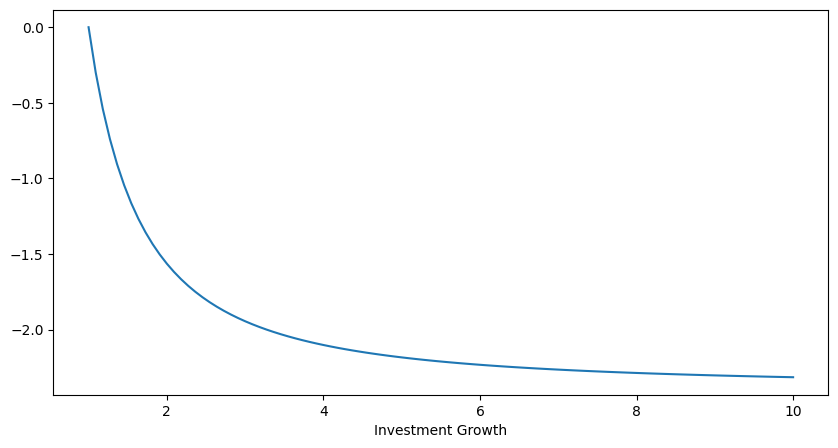

In [15]:
#now set t  constant and vary g_invest
time = 10
#numericlaly solve for the minium of overhang function
# g_invest = sp.symbols("g_invest")
g_invest = np.linspace(1, 10, 100)
loss = total_loss(1000 * g_invest ** time, time)-total_loss(1000, time)
# loss_prime = sp.diff(loss, time)
# g_invest_min = sp.solve(loss_prime, g_invest)
print(loss)



# loss = total_loss(1000 * g_invest ** time, time)
plt.figure(figsize=(10, 5))
plt.plot(g_invest, loss, label="Loss")
plt.xlabel("Investment Growth")


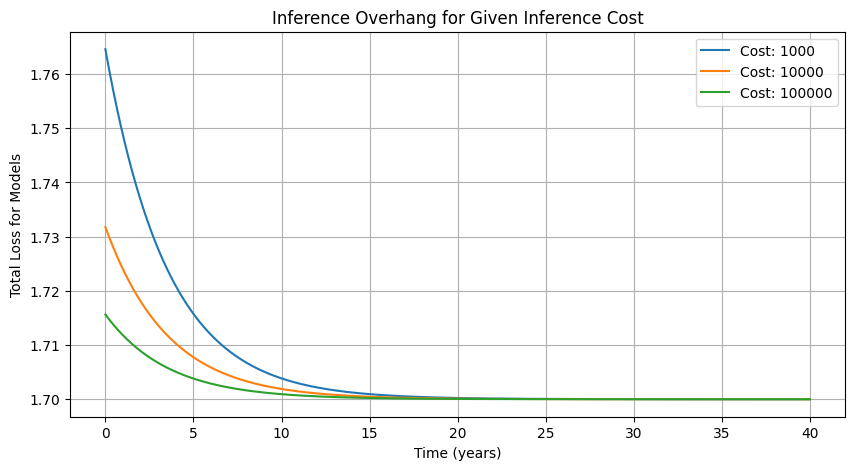

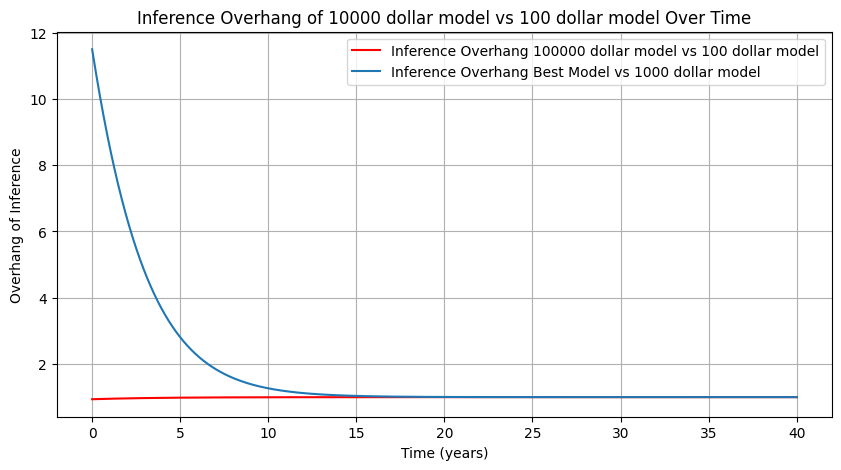

In [16]:
# Model of inference overhang with a set number of parameters
# player1_growth = 1.9
# player2_growth = 1.0
alg_gains_inf = 2


alg_gains = 2
total_loss_inf = lambda cost, time: chin_func(
    (
        ((flops_per_dollar_year0*cost)**2)/ (cost_per_flop_year**(2*time))
        * (alg_gains**time)*(alg_gains_inf**time)
      
    )
)

# total_loss = lambda cost, time: chin_func(
#     (alg_gains**time) * flops_per_dollar_year0 * cost / (cost_per_flop_year**time)
# )

time = np.linspace(0, 40, 10000)
plt.figure(figsize=(10, 5))
for c in [1000, 10000, 100000]:
    loss = total_loss_inf(c, time)
    plt.plot(time, loss, label=f"Cost: {c}")

best_loss_seq = total_loss(1 * (player1_growth) ** time, time)
inf_overhang = total_loss_inf(100000, time) / total_loss_inf(100, time)
inf_bestvs1000dollars = best_loss_seq / total_loss_inf(1, time)

plt.ylabel("Total Loss for Models")
plt.xlabel("Time (years)")
plt.title("Inference Overhang for Given Inference Cost")
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(
    time,
    inf_overhang,
    "r",
    label="Inference Overhang 100000 dollar model vs 100 dollar model",
)
plt.plot(
    time,
    inf_bestvs1000dollars,
    label="Inference Overhang Best Model vs 1000 dollar model",
)

plt.title("Inference Overhang of 10000 dollar model vs 100 dollar model Over Time")
plt.xlabel("Time (years)")
plt.ylabel("Overhang of Inference")
plt.legend()
plt.grid(True)


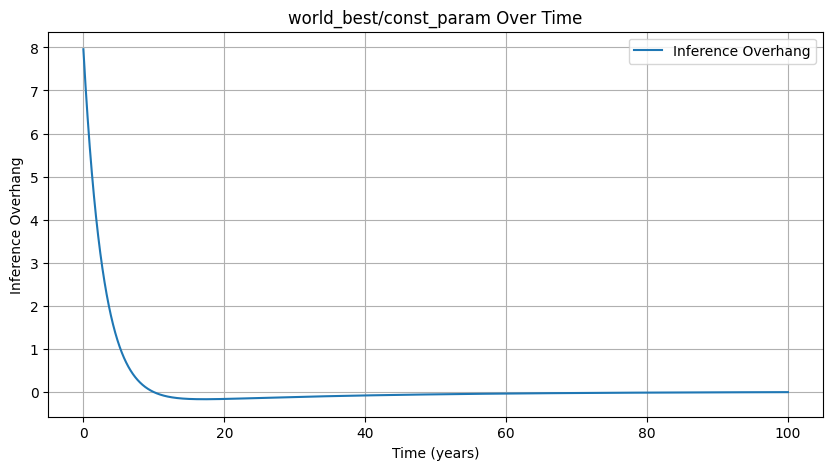

In [17]:
# Inference overhang for constant parameter models
time = np.linspace(0, 100, 10000)
cost_per_flop_year = 1
loss_constant = 1.7
const_params = 1e9
A = 406.4
alpha_year = -0.035
loss_const_param = (
    lambda time, param: loss_constant + A *(2.718**(alpha_year*time)) / (param) ** 0.34
)

plt.figure(figsize=(10, 5))
plt.xlabel("Time (years)")
plt.ylabel("Inference Overhang")
world_loss_seq = total_loss(1000 * (player1_growth) ** time, time)
loss_infoptimal_year_seq = loss_const_param(time, param=const_params)
plt.plot(time, world_loss_seq-loss_infoptimal_year_seq, label="Inference Overhang")

plt.title("world_best/const_param Over Time")
plt.legend()
plt.grid(True)


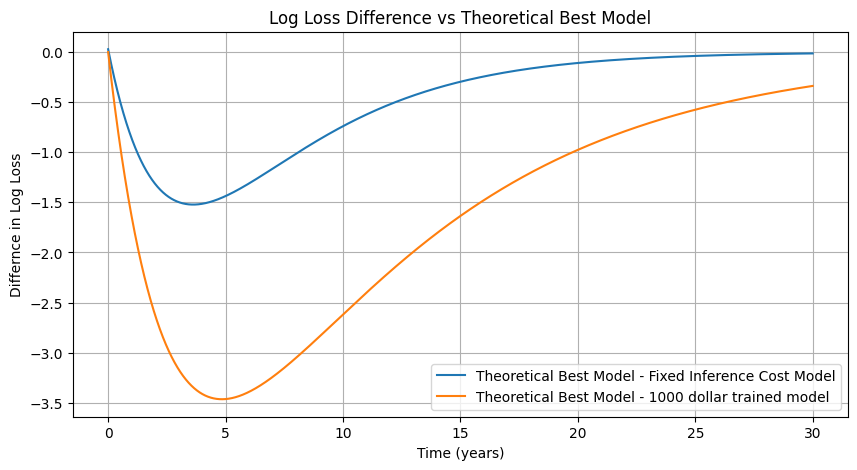

In [18]:
time = np.linspace(0, 30, 10000)
# Plot inference overhang and training overhang at the same time
player1loss = total_loss(1000.0* (5) ** time, time)



# computer inference cost of model that uses 1000 dollars of training
# infcost0 = 
plt.figure(figsize=(10, 5))
plt.plot(time, player1loss-total_loss_inf(.000143, time), label="Theoretical Best Model - Fixed Inference Cost Model")
plt.plot(time, player1loss-total_loss(1000, time), label="Theoretical Best Model - 1000 dollar trained model")


plt.xlabel("Time (years)")
plt.ylabel("Differnce in Log Loss")
plt.legend()
plt.title("Log Loss Difference vs Theoretical Best Model")
plt.grid(True)


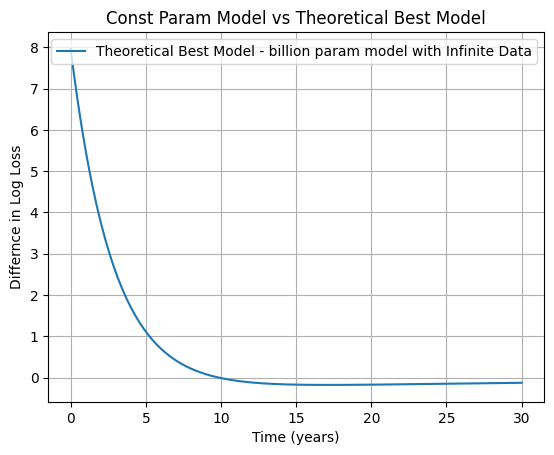

In [19]:
plt.plot(time, player1loss-loss_const_param(time, param=const_params),label=f"Theoretical Best Model - billion param model with Infinite Data")
plt.xlabel("Time (years)")
plt.ylabel("Differnce in Log Loss")
plt.legend()
plt.title("Const Param Model vs Theoretical Best Model")
plt.grid(True)

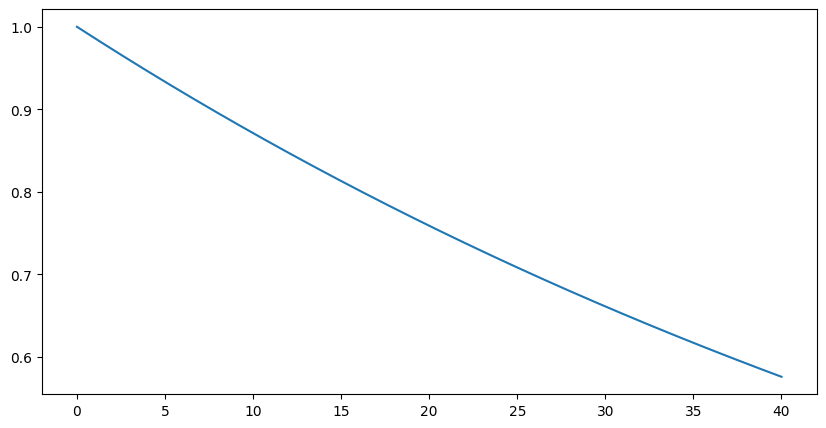

In [71]:
# Another model of inference overhang assuming fixed parameters for better and base model
time = np.linspace(0, 40, 10000)
plt.figure(figsize=(10, 5))
plt.plot(time, 1.5 ** (-0.034 * time), label="Inference Overhang")


In [72]:
# # Symbolic computations for overhang
# # Define the variables
# cost, time = sp.symbols("cost time")
# g_alg, C0, I, t, g_flop, g_invest = sp.symbols("g_alg C0 I t g_flop g_invest")
# L0, A, b, K, g = sp.symbols("L0, A, b, K, g")
# # Define the function
# chin_func = A * I ** (b) + L0
# # total_loss = chin_func.subs(I, (g_alg**t) * C0 * K * g_flop**t)
# best_model_form = chin_func.subs(I, (g**t) * g_invest**t)
# standard_model_form = chin_func.subs(I,g**t )
# # Simplify and display the function
# # total_loss = sp.simplify(total_loss)
# overhang = best_model_form-standard_model_form
# # overhang = sp.simplify(overhang)

# print(latex(total_loss))
# sp.pprint(total_loss)
# print("The overhang is")
# sp.pprint(overhang)


In [73]:
# # calculate when the derivative of overhang is zero wrt time
# # take derivative of overhang wrt time  
# # overhang = overhang.subs(C0, 1000)
# # overhang = overhang.subs(g_alg, 1.8)
# # overhang = overhang.subs(g_flop, 0.8)
# # overhang = overhang.subs(g_invest, 5)
# # overhang = overhang.subs(I, 1)
# # overhang = sp.simplify(overhang)
# print("The overhang is")
# sp.pprint(overhang)
# overhang_derivative = sp.diff(overhang, t)
# overhang_derivative = sp.simplify(overhang_derivative)
# print("The derivative of the overhang is")
# sp.pprint(overhang_derivative)
# # get numerator and denominator of derivative
# numerator, denominator = sp.fraction(overhang_derivative)
# numerator = sp.simplify(numerator)
# # find the roots of the numerator
# roots = sp.solve(numerator, t)

# # overhang = sp.simplify(overhang)
# # print("The derivative of the overhang is")
# # sp.pprint(overhang)


In [74]:
#subsitute values in for all the variables set t to a constant and let g_invest be the variable
overhang = overhang.subs(C0, 1000)
overhang = overhang.subs(g_alg, 1.8)
overhang = overhang.subs(g_flop, 0.8)



/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_64324/3707354998.py:6: RuntimeWarning: divide by zero encountered in log
  y = (1/b)*np.log(np.log(g)/np.log(g*x))*(np.log(x))**-1


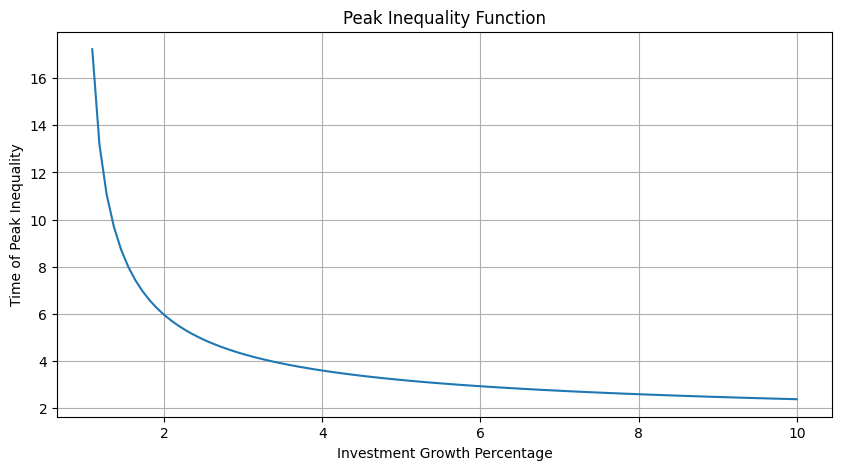

In [75]:
# graph the time of overhang function 
g = np.linspace(1, 10, 100)
#logarithm python
x = 1.8*1.4
b = -0.154
y = (1/b)*np.log(np.log(g)/np.log(g*x))*(np.log(x))**-1
plt.figure(figsize=(10, 5))
plt.plot(g, y)
plt.ylabel("Time of Peak Inequality")
plt.xlabel("Investment Growth Percentage")
plt.title("Peak Inequality Function")
plt.grid(True)

In [76]:
# # comparign models with constant parameters
# upper_param = 1e2
# lower_param = 1e69
# # loss = loss_const_param(time, param=const_params)
# plt.figure(figsize=(10, 5))
# plt.plot(time,loss_const_param(time, param=upper_param)/loss_const_param(time, param=lower_param),  label="Constant Parameter Comparison")

Text(0.5, 1.0, 'Possible Effect of Trade Restrictions on AI Progress')

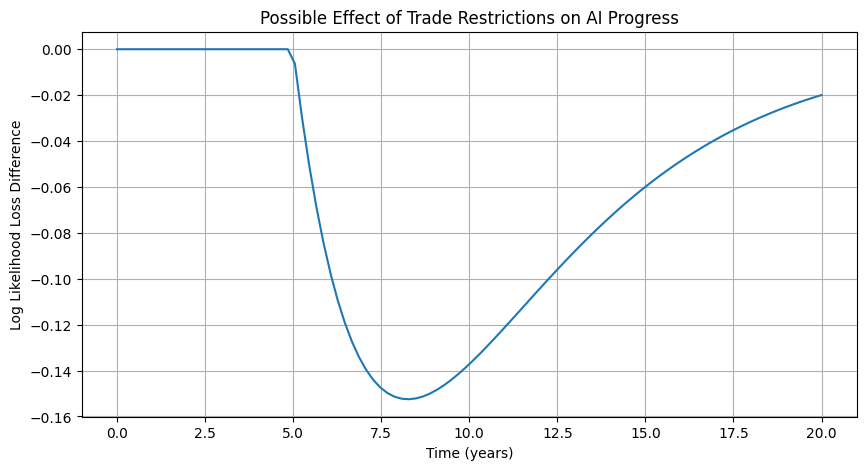

In [90]:
# model of competition when one player has suddently reduced hardware growth 
#trying to model AI pauses and overhang period 
#Plot the overhang when model progress is paused
# import numpy as np

plt.figure(figsize=(10, 5))
#compute loss with exponential investment upto time  t
# intitial_loss = total_loss(1000 * (player1_growth) ** time, time)
#plot this for serval pause-times
trade_restrict_time = 5
restore_time = 15
player1_growth = 5
player2_growth = 5
def hardware_restrict(pause_time):
    loss = []
    times = np.linspace(0, 20, 100)
    for time in times:
        if time < trade_restrict_time:
            # player2growth = 5.0
            loss.append(total_loss(1000 * (player1_growth) ** time, time)- total_loss(1000* (player2_growth)**time, time))
            # loss.append(5)
        else:
            newplayer2growth = 5.0/1.8
            bestloss = total_loss(1000 * (player1_growth) **  time, time) 
            compute_at_restrict = 1000 * (player2_growth) ** trade_restrict_time
            pause_loss = bestloss - total_loss(compute_at_restrict*(newplayer2growth**(time-trade_restrict_time)), time)
            # consumer_loss = total_loss(1000, time)
            # if pause_loss >0 or bestloss < 2.5 or consumer_loss < 2.5:
            # if pause_loss >0:
            #     loss.append(0)
            # else:
            loss.append(pause_loss)
    loss  = np.array(loss)
    return loss
# times
hardware_restrict(trade_restrict_time)
# #plot results
plt.plot(times, hardware_restrict(trade_restrict_time), label="Loss with trade restriction at year 5")
plt.xlabel("Time (years)")
plt.grid(True)
plt.ylabel("Log Likelihood Loss Difference")
plt.title("Possible Effect of Trade Restrictions on AI Progress")
# player2growth = 2.0
# plt.plot(times,total_loss(1000 * (player1_growth) ** times, times)- total_loss(1000* (player2growth)**times, times))

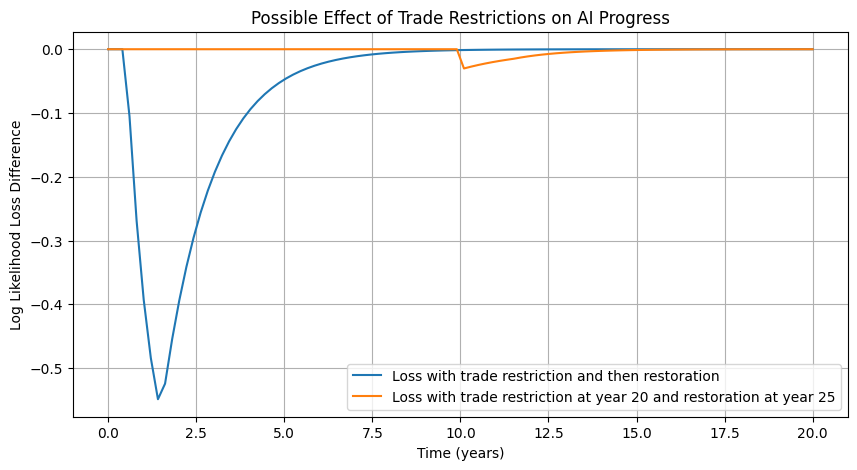

In [119]:
#same model as above with some restore time 
plt.figure(figsize=(10, 5))
#compute loss with exponential investment upto time  t
# intitial_loss = total_loss(1000 * (player1_growth) ** time, time)
#plot this for serval pause-times
trade_restrict_time = 1
restore_time = 5
player1_growth = 5
player2_growth = 5
def hardware_restrict(pause_time, restore_time):
    loss = []
    times = np.linspace(0, 40, 100)
    for time in times:
        bestloss = total_loss(1000 * (player1_growth) **  time, time) 
        if time < pause_time:
            # player2growth = 5.0
            loss.append(total_loss(1000 * (player1_growth) ** time, time)- total_loss(1000* (player2_growth)**time, time))
            # loss.append(5)
       
        elif time < restore_time:
            newplayer2growth = 5.0/1.8
            compute_at_restrict = 1000 * (player2_growth) ** trade_restrict_time
            pause_loss = bestloss - total_loss(compute_at_restrict*(newplayer2growth**(time-trade_restrict_time)), time)
            # consumer_loss = total_loss(1000, time)
            # if pause_loss >0 or bestloss < 2.5 or consumer_loss < 2.5:
            # if pause_loss >0:
            #     loss.append(0)
            # else:
            loss.append(pause_loss)
        else:
            compute_at_restrict = 1000 * (player2_growth) ** trade_restrict_time
            compute_at_restore = compute_at_restrict*(5.0/1.8)**(restore_time-trade_restrict_time)
            loss.append(bestloss - total_loss(compute_at_restore*(5.0**(time-restore_time)), time))


    loss  = np.array(loss)
    return loss
# times
# hardware_restrict(trade_restrict_time)
# #plot results
plt.plot(times, hardware_restrict(1, 3), label="Loss with trade restriction and then restoration")
plt.plot(times,hardware_restrict(20, 23), label="Loss with trade restriction at year 20 and restoration at year 25")
plt.xlabel("Time (years)")
plt.grid(True)
plt.ylabel("Log Likelihood Loss Difference")
plt.title("Possible Effect of Trade Restrictions on AI Progress")
plt.legend()
# player2growth = 2.0
# plt.plot(times,total_loss(1000 * (player1_growth) ** times, times)- total_loss(1000* (player2growth)**times, times))

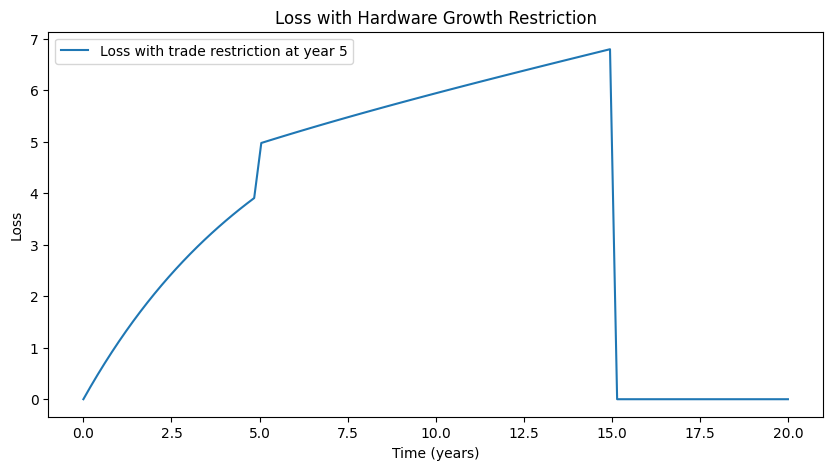